# Linear Regression

1. understanding the problem statements
2. collection of the data
3. explore the data
4. Data cleansing
5. Decide on which algorithm shoul be applicable
6. seperate the data into dependent and independent variables like x and y
7. Dovide the daa into test and train
8. Train the model using the training data and try to buill as model as we can and try to tune
9. test different models using the test data
10. decide on which model should be used based on the model metrics

## Problem Statement: 

## we have to develop a model that can predict the sat exam score of the students based on the marks secured by them in different subjects such as math, GK, sci, apt at high school.

### Target - SAT
### predictors= math, GK, apt, sci

In [4]:
# importing the required oackages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as mino

In [5]:
# read the data set and store into SAT
sat = pd.read_csv("SAT_Exam.csv")

In [6]:
sat

,General_knowledge,Aptitude,Mathematics,Science,SAT
0,73,71,74,73,144
1,93,90,60,97,186
2,89,94,97,98,182
3,96,93,115,110,208
4,73,68,87,83,157
...,...,...,...,...,...
91,80,83,65,65,149
92,90,88,93,98,191
93,93,93,77,72,163
94,80,83,6,3,78


In [7]:
sat.head(10)

,General_knowledge,Aptitude,Mathematics,Science,SAT
0,73,71,74,73,144
1,93,90,60,97,186
2,89,94,97,98,182
3,96,93,115,110,208
4,73,68,87,83,157
5,53,49,36,38,89
6,69,73,71,67,131
7,47,48,55,55,101
8,87,89,66,66,155
9,79,76,83,78,158


In [8]:
sat.shape

(96, 5)

In [9]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   General_knowledge   96 non-null     int64
 1   Aptitude            96 non-null     int64
 2   Mathematics         96 non-null     int64
 3   Science             96 non-null     int64
 4   SAT                 96 non-null     int64
dtypes: int64(5)
memory usage: 3.9 KB


In [10]:
sat.describe()

,General_knowledge,Aptitude,Mathematics,Science,SAT
count,96.000000,96.000000,96.00000,96.000000,96.000000
mean,79.854167,79.916667,76.25000,76.802083,155.968750
std,12.230229,12.189440,22.41569,22.925793,32.427881
min,46.000000,46.000000,6.00000,3.000000,70.000000
25%,74.000000,74.000000,65.00000,65.000000,140.000000
50%,80.000000,81.000000,77.00000,79.000000,157.500000
75%,88.250000,89.000000,90.25000,92.000000,180.000000
max,97.000000,101.000000,125.00000,124.000000,223.000000


In [11]:
sat.isna().sum()

General_knowledge     0
Aptitude              0
Mathematics           0
Science               0
SAT                   0
dtype: int64

In [12]:
sat.isnull().sum()

General_knowledge     0
Aptitude              0
Mathematics           0
Science               0
SAT                   0
dtype: int64

In [15]:
pd.DataFrame(sat.kurtosis(),columns = ['Kurtosis'])

,Kurtosis
General_knowledge,0.604407
Aptitude,0.888228
Mathematics,0.750723
Science,0.655287
SAT,0.552747


In [16]:
sat.kurtosis()

General_knowledge     0.604407
Aptitude              0.888228
Mathematics           0.750723
Science               0.655287
SAT                   0.552747
dtype: float64

In [17]:
sat.skew()

General_knowledge    -0.826330
Aptitude             -0.916175
Mathematics          -0.496929
Science              -0.566476
SAT                  -0.646051
dtype: float64

In [18]:
pd.DataFrame(sat.skew(),columns=['skew'])

,skew
General_knowledge,-0.826330
Aptitude,-0.916175
Mathematics,-0.496929
Science,-0.566476
SAT,-0.646051


In [20]:
sat.columns

Index(['General_knowledge ', 'Aptitude ', 'Mathematics ', 'Science ', 'SAT'], dtype='object')

In [21]:
## ewmove the space in the column names

sat.columns = sat.columns.str.strip()

In [22]:
sat.columns

Index(['General_knowledge', 'Aptitude', 'Mathematics', 'Science', 'SAT'], dtype='object')

In [23]:
# check for any null value
sat.isnull().sum()

General_knowledge    0
Aptitude             0
Mathematics          0
Science              0
SAT                  0
dtype: int64

<AxesSubplot:>

<Figure size 1440x360 with 0 Axes>

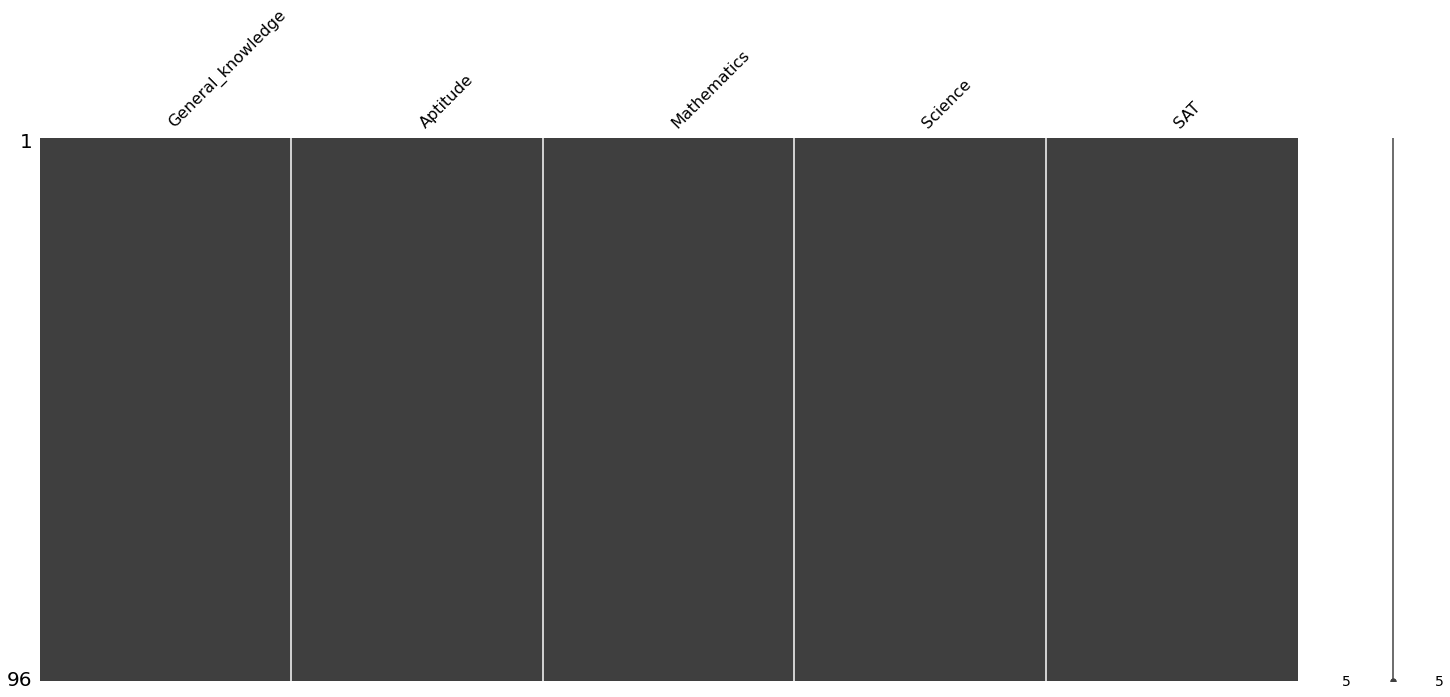

In [24]:
# nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion

plt.figure(figsize=(20,5))
mino.matrix(sat)

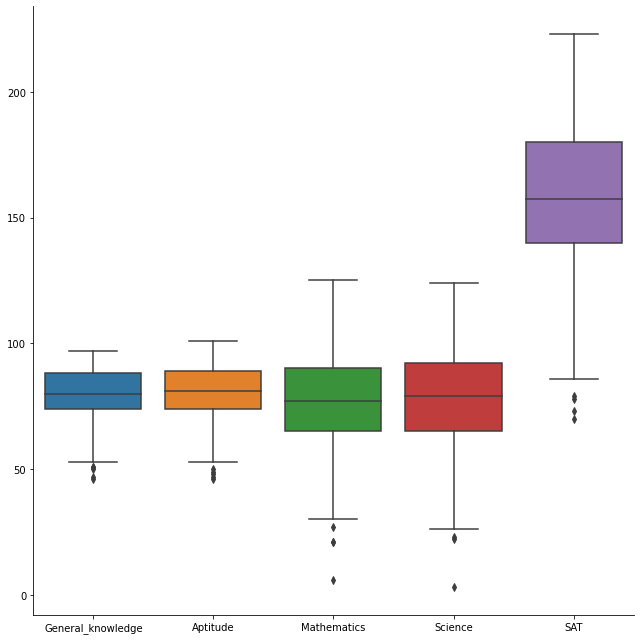

In [26]:
# sns catplot for outliers

sns.catplot(data=sat,kind ='box',height=9)

<AxesSubplot:>

<Figure size 1440x1080 with 0 Axes>

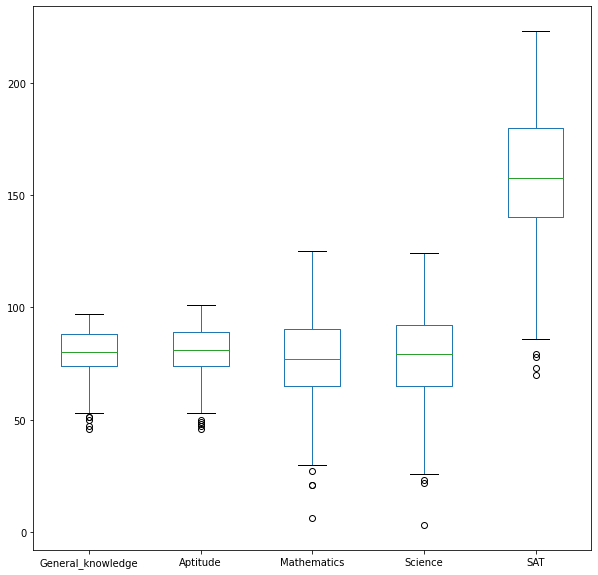

In [29]:
## Box plot for outlier
plt.figure(figsize=(20,15))
sat.plot(kind ='box',figsize= (10,10))

In [ ]:
sat.isna().sum(axis=1)

In [30]:
# filtering based on the outliers

q1 = sat.quantile(0.05)
q3 = sat.quantile(.95)
iqr = q3-q1
l = q1-1.5*iqr
u = q3+1.5*iqr
print(l)
print(u)
sat_new = sat[(sat > l) & (sat < u)]

General_knowledge   -12.750
Aptitude            -13.375
Mathematics         -80.625
Science             -77.500
SAT                 -88.750
dtype: float64
General_knowledge    161.250
Aptitude             161.625
Mathematics          226.375
Science              224.500
SAT                  381.250
dtype: float64


In [31]:
sat_new

,General_knowledge,Aptitude,Mathematics,Science,SAT
0,73,71,74,73,144
1,93,90,60,97,186
2,89,94,97,98,182
3,96,93,115,110,208
4,73,68,87,83,157
...,...,...,...,...,...
91,80,83,65,65,149
92,90,88,93,98,191
93,93,93,77,72,163
94,80,83,6,3,78


In [32]:
sat_new.isna().sum()

General_knowledge    0
Aptitude             0
Mathematics          0
Science              0
SAT                  0
dtype: int64

In [33]:
sat.corr()

,General_knowledge,Aptitude,Mathematics,Science,SAT
General_knowledge,1.000000,0.963232,0.622769,0.640775,0.838191
Aptitude,0.963232,1.000000,0.590701,0.607482,0.797194
Mathematics,0.622769,0.590701,1.000000,0.976331,0.926694
Science,0.640775,0.607482,0.976331,1.000000,0.949496
SAT,0.838191,0.797194,0.926694,0.949496,1.000000


<AxesSubplot:>

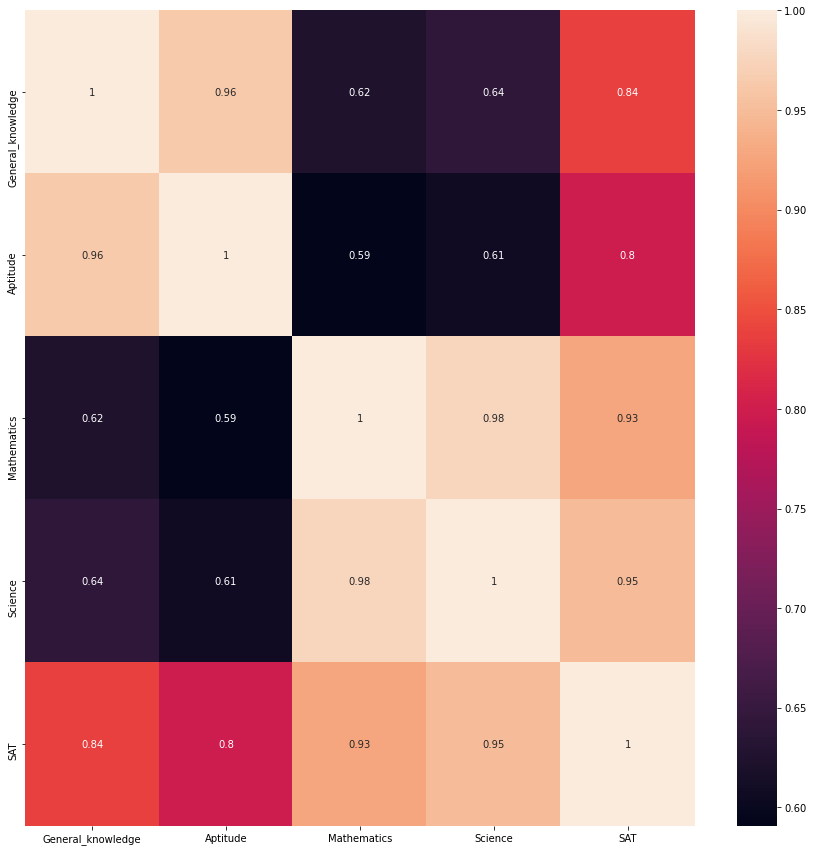

In [39]:
plt.figure(figsize=(15,15))
sns.heatmap(sat.corr(),annot = True)

In [40]:
sat.cov() # does not help us in deciding anything

,General_knowledge,Aptitude,Mathematics,Science,SAT
General_knowledge,149.578509,143.598246,170.731579,179.665570,332.426974
Aptitude,143.598246,148.582456,161.400000,169.762281,315.113158
Mathematics,170.731579,161.400000,502.463158,501.734211,673.607895
Science,179.665570,169.762281,501.734211,525.591996,705.888487
SAT,332.426974,315.113158,673.607895,705.888487,1051.567434


In [41]:
# import for model building
from sklearn.model_selection import train_test_split  # to split the data
from sklearn.linear_model import LinearRegression # for model selection
from sklearn.metrics import r2_score # for evaluating the model
from statsmodels.stats.outliers_influence import variance_inflation_factor # for caluculating VIF, for multicollinearity

In [43]:
# sepeate the target and feature column
X = sat.drop('SAT', axis = 1)  # or X = sat.iloc[:,:4]
y = sat['SAT']  # or y = sat.iloc[:,4]

In [44]:
help(LinearRegression)  # if you wan to see the class info

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtr

In [45]:
import sklearn

In [46]:
help(sklearn)  # to see the package info

Help on package sklearn:

NAME
    sklearn

DESCRIPTION
    Machine learning module for Python
    
    sklearn is a Python module integrating classical machine
    learning algorithms in the tightly-knit world of scientific Python
    packages (numpy, scipy, matplotlib).
    
    It aims to provide simple and efficient solutions to learning problems
    that are accessible to everybody and reusable in various contexts:
    machine-learning as a versatile tool for science and engineering.
    
    See http://scikit-learn.org for complete documentation.

PACKAGE CONTENTS
    __check_build (package)
    _build_utils (package)
    _config
    _distributor_init
    _isotonic
    _loss (package)
    _min_dependencies
    base
    calibration
    cluster (package)
    compose (package)
    conftest
    covariance (package)
    cross_decomposition (package)
    datasets (package)
    decomposition (package)
    discriminant_analysis
    dummy
    ensemble (package)
    exceptions
    experime

In [47]:
# splitting training andtesting data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [48]:
# fitting regression model
reg = LinearRegression(normalize=True)
reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [49]:
# intercept = C , y intercept when x = 0
reg.intercept_

-2.695942373484911

In [50]:
# coffiecinetnt value = y = m1x1+m2x2.........+mnxn + c, x1 = GK, x2 = apt......, m1, m2 m3 m4 are the coefficients
reg.coef_

array([ 1.12043666, -0.08620657,  0.03621845,  0.95293196])

In [51]:
# Prediction
pred = reg.predict(X_test)

In [52]:
pred

array([186.94370719, 165.11391398, 185.82002461,  87.50699513,
       155.37953665, 171.94647294, 138.81162999, 154.59468616,
       128.53685757, 145.77814436,  72.29678184, 161.57324095,
       139.4247108 , 171.36649808, 100.2299379 , 153.41857936,
       170.45067353, 158.58673269, 147.60366582, 152.3935894 ,
       136.19295783, 144.85105295, 205.8364035 , 155.83677428,
       157.35706391, 139.49619204, 134.73905889, 178.25037974,
       196.83030287])

In [53]:
y_test

26    191
84    170
2     182
55     88
68    151
81    172
16    137
78    156
54    126
66    143
53     79
88    160
71    135
13    174
7     101
30    154
22    176
24    158
33    147
8     155
43    139
62    143
3     208
86    156
45    159
48    140
6     131
95    180
80    199
Name: SAT, dtype: int64

In [54]:
# comparing actual and predicted values
predictionTable = pd.DataFrame({"Actual" : y_test,"Predicted" : pred})
predictionTable

,Actual,Predicted
26,191,186.943707
84,170,165.113914
2,182,185.820025
55,88,87.506995
68,151,155.379537
81,172,171.946473
16,137,138.811630
78,156,154.594686
54,126,128.536858
66,143,145.778144


In [55]:
score = r2_score(y_test,pred)
score

0.9899690508884422

In [56]:
from sklearn import metrics

In [57]:
print("MAE",metrics.mean_absolute_error(y_test,pred))
print("MSE",metrics.mean_squared_error(y_test,pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE 2.3807843314680603
MSE 8.538711247887134
RMSE 2.9221073299738896


# Building Linear REgression using OLS Model

In [58]:
### Lets assume that we have build a linear Regression model 

### while splitting the data into Train and Test we have to add a constant column

In [59]:
import statsmodels.api as sm
from scipy import stats

# adding constant to training data
X = sm.add_constant(X)
X

,const,General_knowledge,Aptitude,Mathematics,Science
0,1.0,73,71,74,73
1,1.0,93,90,60,97
2,1.0,89,94,97,98
3,1.0,96,93,115,110
4,1.0,73,68,87,83
...,...,...,...,...,...
91,1.0,80,83,65,65
92,1.0,90,88,93,98
93,1.0,93,93,77,72
94,1.0,80,83,6,3


In [60]:
# splitting training andtesting data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [61]:
X_train

,const,General_knowledge,Aptitude,Mathematics,Science
75,1.0,96,91,91,88
60,1.0,92,93,109,111
79,1.0,51,50,27,22
85,1.0,88,87,116,117
91,1.0,80,83,65,65
...,...,...,...,...,...
92,1.0,90,88,93,98
67,1.0,74,74,50,47
64,1.0,83,88,92,92
47,1.0,81,86,64,61


In [62]:
#Fit the ols model
model_ols = sm.OLS(y_train,X_train).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    SAT   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1831.
Date:                Fri, 20 Aug 2021   Prob (F-statistic):           1.39e-63
Time:                        18:15:05   Log-Likelihood:                -169.93
No. Observations:                  67   AIC:                             349.9
Df Residuals:                      62   BIC:                             360.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.6959      2.77

## PRedicting on the train data

In [63]:
sat_pred_train = model_ols.predict(X_train)

In [64]:
pd.DataFrame(sat_pred_train,columns=['Trained_data_predicted_values'])

,Trained_data_predicted_values
75,184.175071
60,202.090278
79,72.078400
85,204.096892
91,144.078622
...,...
92,187.312827
67,120.435809
64,173.715960
47,141.092492


In [65]:
pd.DataFrame({'Predicted_Train_Values': sat_pred_train,"Actual_Train_Values":y_train})

,Predicted_Train_Values,Actual_Train_Values
75,184.175071,183
60,202.090278,203
79,72.078400,70
85,204.096892,208
91,144.078622,149
...,...,...
92,187.312827,191
67,120.435809,121
64,173.715960,171
47,141.092492,146


## PRedicting on the test data

In [66]:
sat_pred_test = model_ols.predict(X_test)

In [67]:
pd.DataFrame(sat_pred_test,columns=['Test_data_Predicted_Values'])

,Test_data_Predicted_Values
26,186.943707
84,165.113914
2,185.820025
55,87.506995
68,155.379537
81,171.946473
16,138.811630
78,154.594686
54,128.536858
66,145.778144


In [68]:
pd.DataFrame({"Predicted_test_values":sat_pred_test,"Actual_test_values":y_test})

,Predicted_test_values,Actual_test_values
26,186.943707,191
84,165.113914,170
2,185.820025,182
55,87.506995,88
68,155.379537,151
81,171.946473,172
16,138.811630,137
78,154.594686,156
54,128.536858,126
66,145.778144,143


## Calculating MAE, MSE, RMSE for Train data of OLS method 

In [73]:
print("MAE",metrics.mean_absolute_error(y_train,sat_pred_train))
print("MSE",metrics.mean_squared_error(y_train,sat_pred_train))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_train,sat_pred_train)))

MAE 2.6043789582697014
MSE 9.34266895355061
RMSE 3.0565779809372784


## Calculating MAE, MSE, RMSE for test data of OLS method m

In [69]:
print("MAE",metrics.mean_absolute_error(y_test,sat_pred_test))
print("MSE",metrics.mean_squared_error(y_test,sat_pred_test))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,sat_pred_test)))

MAE 2.3807843314680652
MSE 8.538711247887157
RMSE 2.9221073299738936


## VIF - Variance inflation factor

In [78]:
vif = pd.DataFrame()
vif['vif_factor'] =  [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['vif_predictors'] = X.columns
vif

,vif_factor,vif_predictors
0,46.662643,const
1,14.865286,General_knowledge
2,13.884816,Aptitude
3,21.385071,Mathematics
4,22.217766,Science


- Multicollinearity always exists in pairs.
- Here the Multicollinearity exists between General_Knowledge and Aptitude.
- Mathematics and Science also has multicollinearity.
- It's good to drop the variables with high VIF from the pair so that the other one get's adjusted.
- Let's drop General_Knowledge and Science and build the model using Aptitude and Mathematics

In [79]:
X_multicol = sat[['Aptitude','Mathematics']]
y_multicol = sat.iloc[:,4]

In [81]:
X_multicol

,Aptitude,Mathematics
0,71,74
1,90,60
2,94,97
3,93,115
4,68,87
...,...,...
91,83,65
92,88,93
93,93,77
94,83,6


In [82]:
y_multicol

0     144
1     186
2     182
3     208
4     157
     ... 
91    149
92    191
93    163
94     78
95    180
Name: SAT, Length: 96, dtype: int64

In [83]:
X_multicol = sm.add_constant(X_multicol)
X_train_mul,X_test_mul,y_train_mul, y_test_mul = train_test_split(X_multicol,y_multicol, test_size=0.3,random_state=0)


In [86]:
model_ols_mul = sm.OLS(y_train_mul,X_train_mul).fit()
print(model_ols_mul.summary())

                            OLS Regression Results                            
Dep. Variable:                    SAT   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     647.9
Date:                Fri, 20 Aug 2021   Prob (F-statistic):           3.36e-43
Time:                        20:03:25   Log-Likelihood:                -227.69
No. Observations:                  67   AIC:                             461.4
Df Residuals:                      64   BIC:                             468.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3610      6.062      0.060      

In [87]:
sat_pred_train_mul = model_ols_mul.predict(X_train_mul)
pd.DataFrame(sat_pred_train_mul,columns=['Train_data_predicted_values'])

,Train_data_predicted_values
75,182.013493
60,202.422877
79,76.570584
85,203.784618
91,147.574892
...,...
92,181.155268
67,123.452876
64,180.129204
47,149.459182


In [89]:
pd.DataFrame({'predicted_train_values':sat_pred_train_mul,'Actual_train_values':y_train_mul})

,predicted_train_values,Actual_train_values
75,182.013493,183
60,202.422877,203
79,76.570584,70
85,203.784618,208
91,147.574892,149
...,...,...
92,181.155268,191
67,123.452876,121
64,180.129204,171
47,149.459182,146


In [90]:
sat_pred_test_mul=model_ols_mul.predict(X_test_mul)
pd.DataFrame(sat_pred_test_mul,columns=['Test_data_predicted_values'])

,Test_data_predicted_values
26,182.125385
84,158.358079
2,191.080229
55,95.207571
68,160.689937
81,169.010340
16,139.422328
78,158.450938
54,133.713514
66,142.332681


In [91]:
pd.DataFrame({'Predicted_test_values':sat_pred_test_mul,'Actual__test_values':y_test_mul})

,Predicted_test_values,Actual__test_values
26,182.125385,191
84,158.358079,170
2,191.080229,182
55,95.207571,88
68,160.689937,151
81,169.010340,172
16,139.422328,137
78,158.450938,156
54,133.713514,126
66,142.332681,143


In [93]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_mul, sat_pred_test_mul))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_mul, sat_pred_test_mul))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_mul, sat_pred_test_mul)))

Mean Absolute Error: 4.6076938944285715
Mean Squared Error: 36.254806726085484
Root Mean Squared Error: 6.021196453038672


In [96]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train_mul, sat_pred_train_mul))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train_mul, sat_pred_train_mul))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train_mul,sat_pred_train_mul)))

Mean Absolute Error: 5.235541981968906
Mean Squared Error: 52.392116821387035
Root Mean Squared Error: 7.238239898026801


In [97]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_multicol.values, i) for i in range(X_multicol.shape[1])]
vif["VIF Predictors"] = X_multicol.columns
vif

,VIF Factor,VIF Predictors
0,44.781009,const
1,1.535927,Aptitude
2,1.535927,Mathematics


# Predicting the values for unforseen data using the model built using sklearn Regressor

In [122]:
print('Enter Below values to predict the SAT score')
General_knowledge=int(input('Enter Value for General_knowledge: '))
Aptitude=int(input('Enter Value for Aptitude: '))
Mathematics=int(input('Enter Value Mathematics: '))
Science=int(input('Enter Value Science: '))
my_array = np.array([General_knowledge,Aptitude,Mathematics,Science])
print('predicted Value for SAT score',reg.predict(my_array.reshape(1, -1)))

Enter Below values to predict the SAT score
Enter Value for General_knowledge: 56
Enter Value for Aptitude: 67
Enter Value Mathematics: 9
Enter Value Science: 89
predicted Value for SAT score [139.40958069]


In [123]:
print('Enter Below values to predict the SAT score')
Constant=float(input('Enter Value for Constant: '))
General_knowledge=int(input('Enter Value for General_knowledge: '))
Aptitude=int(input('Enter Value for Aptitude: '))
Mathematics=int(input('Enter Value Mathematics: '))
Science=int(input('Enter Value Science: '))
my_array = np.array([Constant,General_knowledge,Aptitude,Mathematics,Science])
print('predicted Value for SAT score',model_ols.predict(my_array.reshape(1, -1)))

Enter Below values to predict the SAT score
Enter Value for Constant: 1
Enter Value for General_knowledge: 56
Enter Value for Aptitude: 67
Enter Value Mathematics: 9
Enter Value Science: 89
predicted Value for SAT score [139.40958069]


In [106]:
pip install lmdiag

Note: you may need to restart the kernel to use updated packages.
  Using cached property_cached-1.6.4-py2.py3-none-any.whl (7.8 kB)


In [107]:
import lmdiag

<module 'matplotlib.pyplot' from 'C:\\Users\\bhanu\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

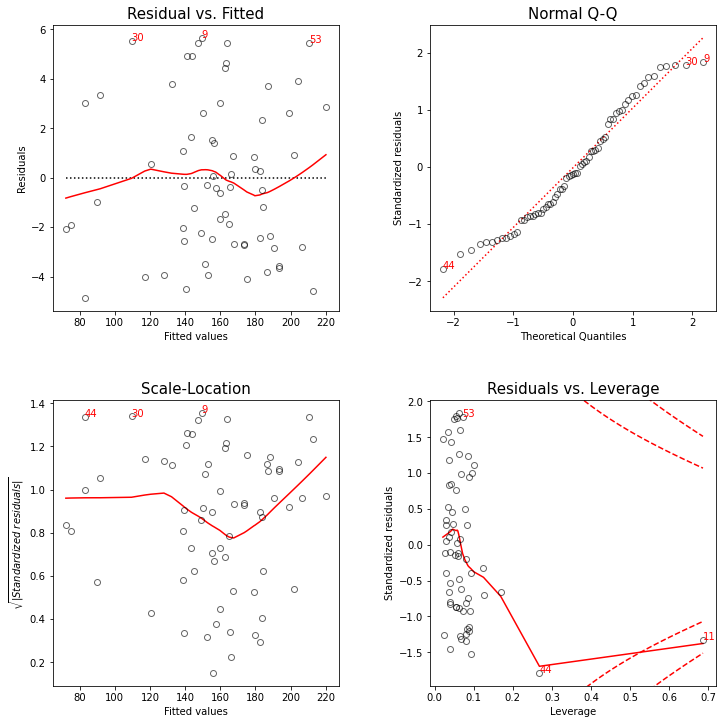

In [109]:
plt.figure(figsize=(10,10))
lmdiag.plot(model_ols)

<module 'matplotlib.pyplot' from 'C:\\Users\\bhanu\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

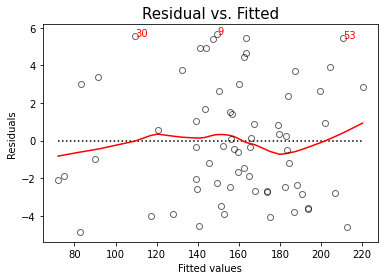

In [110]:
lmdiag.resid_fit(model_ols)

<module 'matplotlib.pyplot' from 'C:\\Users\\bhanu\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

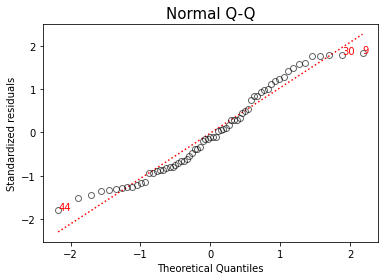

In [111]:
lmdiag.q_q(model_ols)


<module 'matplotlib.pyplot' from 'C:\\Users\\bhanu\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

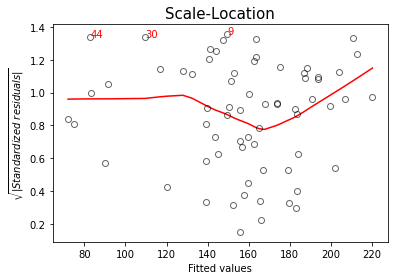

In [112]:
lmdiag.scale_loc(model_ols)

<module 'matplotlib.pyplot' from 'C:\\Users\\bhanu\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

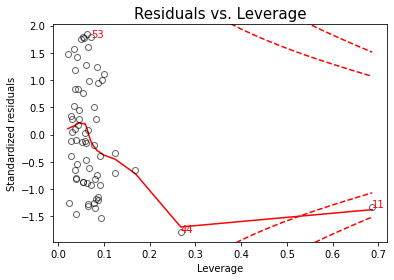

In [113]:
lmdiag.resid_lev(model_ols)

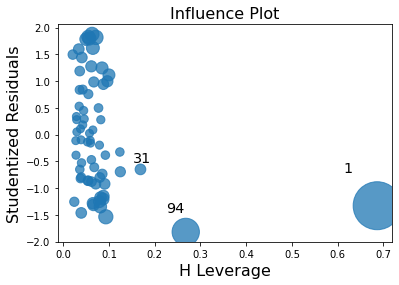

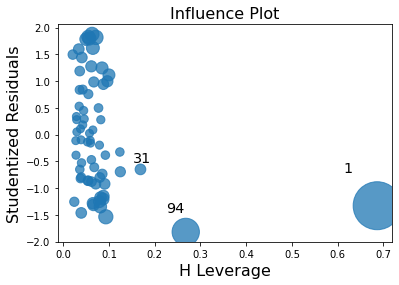

In [114]:
sm.graphics.influence_plot(model_ols)

In [119]:
y_test


26    191
84    170
2     182
55     88
68    151
81    172
16    137
78    156
54    126
66    143
53     79
88    160
71    135
13    174
7     101
30    154
22    176
24    158
33    147
8     155
43    139
62    143
3     208
86    156
45    159
48    140
6     131
95    180
80    199
Name: SAT, dtype: int64

## Removing 53,44,11 observation from the data which are influential points and checking the model accuracy

In [125]:
sat1 = sat.drop([11,44,53], axis = 0)
sat1

,General_knowledge,Aptitude,Mathematics,Science,SAT
0,73,71,74,73,144
1,93,90,60,97,186
2,89,94,97,98,182
3,96,93,115,110,208
4,73,68,87,83,157
...,...,...,...,...,...
91,80,83,65,65,149
92,90,88,93,98,191
93,93,93,77,72,163
94,80,83,6,3,78


In [126]:
# sepeate the target and feature column
X = sat1.drop('SAT', axis = 1)  # or X = sat.iloc[:,:4]
y = sat1['SAT']  # or y = sat.iloc[:,4]

In [127]:
# splitting training andtesting data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [128]:
# fitting regression model
reg = LinearRegression(normalize=True)
reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [130]:
# Prediction
pred = reg.predict(X_test)
pred

array([186.02053159,  75.22360545, 152.66905186, 167.69898051,
       139.54645607, 128.56068055, 174.04544939, 140.701176  ,
       140.14151392, 197.5363434 , 172.24515718, 101.37412279,
       139.63905839, 182.85743652, 156.8734028 , 145.09031181,
       151.97767982, 140.01668622, 139.85541804, 179.80626124,
       221.00591558, 135.7674414 , 206.99487748, 135.16725036,
       213.95986676, 183.21527296, 163.25268008, 148.67153681])

In [131]:
# comparing actual and predicted values
predictionTable = pd.DataFrame({"Actual" : y_test,"Predicted" : pred})
predictionTable

,Actual,Predicted
2,182,186.020532
31,73,75.223605
58,148,152.669052
17,168,167.698981
14,140,139.546456
54,126,128.560681
64,171,174.045449
47,146,140.701176
34,139,140.141514
80,199,197.536343


In [132]:
score = r2_score(y_test,pred)
score

0.9905132052621458

In [133]:
print("MAE",metrics.mean_absolute_error(y_test,pred))
print("MSE",metrics.mean_squared_error(y_test,pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE 2.5367465965385914
MSE 9.640567936232562
RMSE 3.1049263978768584


## Before Dropping the influential points

- MAE 2.3807843314680603
- MSE 8.538711247887134
- RMSE 2.9221073299738896


 - Dropping the influential points increased the RMSE value., So these influential points are 
 - required to reduce the residual and for better RMSE

